<a href="https://colab.research.google.com/github/stella-melgaco/stella-melgaco/blob/main/Stella_Atividade_pratica_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 03 - Análise de séries temporais
---
##### Disciplina: Uso de dados para ciências da Terra e ambiental em Python I

##### Aluna: Stella Melgaço

## Parte 1 - dados climáticos do Brasil

Download dos dados

In [360]:
##Executar a célula e clicar em RESTART RUNTIME
!pip install --upgrade matplotlib

Importar bibliotecas:

In [361]:
#importar bibliotecas
import os
import urllib.request
import zipfile
import shutil
import pandas as pd

import matplotlib.pyplot as plt


Escolher o diretório e criar pasta "data":

In [362]:
# Set working directory
os.chdir('/content')

# make `data` directory
os.mkdir('data')

FileExistsError: ignored

Utilizando a função get_inmet_files, baixa-se os dados climáticos de uma única estação da base de dados do Instituto Nacional de Metereologia (INMET).


In [363]:
# get data from inmet
def get_inmet_files(id,
                    dst = 'data',
                    url = 'https://portal.inmet.gov.br/uploads/dadoshistoricos',
                    yr_start = 2000,
                    yr_end = 2018):
  """
  Download meteorological data from INMET

  Parameters
  ----------
  id : str
      The station ID is a code that you find at https://mapas.inmet.gov.br/, 
      before the name of the selected station. 
      Ex: 'A618' for station 'A618 - Teresópolis-Parque Nacional'

  dst : str
      destination folder
  
  url : str
      url for download. Currently works only for INMET data
  
  yr_start : int
      data starting year
  
  yr_end : int
      data ending year

  Returns
  -------
  None

  """
  # iterate over the years
  for year in range(yr_start,yr_end+1):
    
    # download data for `year`
    filename = os.path.join(dst, str(year) + '.zip')
    src = os.path.join(url, str(year) + '.zip')
    urllib.request.urlretrieve(url = src,
                               filename = filename)
    print('\n')
    print('Downloaded', filename.partition('/')[-1], 'from', src)
    
    # iterate over the csv files in the zip file
    archive = zipfile.ZipFile(filename, 'r')
    for input_file in archive.namelist():
      # looks for desired station
      if input_file.find(id) != -1:
        # extract, copy, and remove files
        with zipfile.ZipFile(filename, 'r') as zipObj:
          zipObj.extract(input_file)
          shutil.copyfile(input_file, 'data/' + input_file.partition('/')[-1])
          os.remove(input_file)
          os.rmdir(input_file.partition('/')[0])
        print('Extracted', input_file)

    # delete zip file
    os.remove(filename)

Para pegar os dados:

veja as estações disponíveis em https://mapas.inmet.gov.br/.
escolha uma estação AUTOMÁTICA (círculo verde) de um local que tenha alguma relevância para você, preferencialmente fora da Grande Rio.
Execute a célula abaixo. Os dados de cada ano disponível aparecerá na pasta data.

A estação escolhida é A607, por ser a estação automática mais próxima da foz do rio Paraíba do Sul que é a área de estudo.

In [364]:
id = 'A607'
get_inmet_files(id)



Downloaded 2000.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2000.zip


Downloaded 2001.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2001.zip


Downloaded 2002.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2002.zip


Downloaded 2003.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2003.zip


Downloaded 2004.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2004.zip


Downloaded 2005.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2005.zip


Downloaded 2006.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2006.zip
Extracted 2006/INMET_SE_RJ_A607_CAMPOS_25-09-2006_A_31-12-2006.CSV


Downloaded 2007.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2007.zip
Extracted 2007/INMET_SE_RJ_A607_CAMPOS_01-01-2007_A_31-12-2007.CSV


Downloaded 2008.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2008.zip
Extracted 2008/INMET_SE_RJ_A607_CAMPOS_01-01-2008_A_31-12-2008.CSV


Downl

KeyboardInterrupt: ignored

###Exercício 01

Importe um arquivo e descubra o valor do na_values.

In [365]:
# Exercício 01
filename = "/content/data/INMET_SE_RJ_A607_CAMPOS_01-01-2007_A_31-12-2007.CSV"

A607_INMET = pd.read_csv(filename, delimiter=';', header=8, encoding = "ISO-8859-1", engine='python', decimal=",")
A607_INMET.describe()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,0.0
mean,-15.852877,995.920788,996.165856,995.674212,-3842.222226,7.719315,3.440833,8.272043,7.198493,3.904132,2.984532,65.269292,60.147603,62.781279,-7649.647374,-7677.025126,-7677.713653,NaN
std,399.441255,439.947510,439.957121,439.937755,5734.322347,400.401950,400.221938,400.425670,400.379655,400.239967,400.204317,402.938436,402.830719,402.888934,4274.097559,4224.004317,4222.751645,NaN
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,NaN
25%,0.000000,1009.900000,1010.200000,1009.600000,-9999.000000,21.000000,17.600000,21.400000,20.600000,18.100000,17.100000,71.000000,63.000000,67.000000,-9999.000000,-9999.000000,-9999.000000,NaN
50%,0.000000,1013.200000,1013.400000,1012.900000,29.950000,23.500000,19.900000,24.000000,23.100000,20.300000,19.400000,86.000000,81.000000,84.000000,-9999.000000,-9999.000000,-9999.000000,NaN
75%,0.000000,1016.800000,1017.000000,1016.500000,1394.200000,26.100000,21.700000,26.825000,25.500000,22.100000,21.300000,93.000000,91.000000,92.000000,-9999.000000,-9999.000000,-9999.000000,NaN
max,47.200000,1026.000000,1026.100000,1025.800000,4144.800000,38.100000,25.100000,38.700000,36.600000,25.900000,24.800000,98.000000,98.000000,98.000000,360.000000,18.400000,9.800000,NaN




> O valor de na_values é -9999.00




### Exercício 02

In [366]:
# Exercício 02
# importar bibliotecas
import glob
import pandas as pd

In [367]:
# criar uma lista de todos os itens no diretório de dados identificados pelo caminho "data/*INMET*"
filelist = glob.glob("data/*INMET*")

In [368]:
filelist

['data/INMET_SE_RJ_A607_CAMPOS_01-01-2012_A_31-12-2012.CSV',
 'data/INMET_SE_RJ_A607_CAMPOS_01-01-2018_A_31-12-2018.CSV',
 'data/INMET_SE_RJ_A607_CAMPOS_01-01-2017_A_31-12-2017.CSV',
 'data/INMET_SE_RJ_A607_CAMPOS_01-01-2015_A_31-12-2015.CSV',
 'data/INMET_SE_RJ_A607_CAMPOS_01-01-2014_A_31-12-2014.CSV',
 'data/INMET_SE_RJ_A607_CAMPOS_01-01-2013_A_31-12-2013.CSV',
 'data/INMET_SE_RJ_A607_CAMPOS_01-01-2008_A_31-12-2008.CSV',
 'data/INMET_SE_RJ_A607_CAMPOS_01-01-2007_A_31-12-2007.CSV',
 'data/INMET_SE_RJ_A607_CAMPOS_01-01-2016_A_31-12-2016.CSV',
 'data/INMET_SE_RJ_A607_CAMPOS_01-01-2009_A_31-12-2009.CSV',
 'data/INMET_SE_RJ_A607_CAMPOS_01-01-2010_A_31-12-2010.CSV',
 'data/INMET_SE_RJ_A607_CAMPOS_01-01-2011_A_31-12-2011.CSV',
 'data/INMET_SE_RJ_A607_CAMPOS_25-09-2006_A_31-12-2006.CSV']

In [369]:
#criando pandas dataframe vazio para preencher com loop for em seguida
pddf_stella = pd.DataFrame()

Concatenar em um único dataframe todos os arquivos contidos na pasta data:

In [370]:
# Exercício 02 - concatenar

#defininir path 
path= "/content/"
# usar loop para converter arquivos .csv em pandas dataframe e adicionar na lista "filelist"
# definir na values como -9999 e em parse_dates unir as colunas de data e hora 
for i in range(0, len(filelist)):
    filenames=filelist[i]
    file = pd.read_csv(path+filenames, delimiter=';', 
                       header=8, encoding = "ISO-8859-1", 
                       engine='python', decimal=",", na_values=["-9999"],
                    #unindo data e hora
                       parse_dates=[['DATA (YYYY-MM-DD)', 'HORA (UTC)']])

    # concatenar pandas dataframes 
    pddf_stella = pd.concat([pddf_stella,file])
    
# print novo dataframe

pddf_stella

,DATA (YYYY-MM-DD)_HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2012-01-01 00:00:00,0.2,1008.2,1008.3,1008.1,NaN,24.7,23.7,24.8,24.5,24.0,23.6,96.0,94.0,95.0,57.0,5.8,3.4,NaN
1,2012-01-01 01:00:00,0.0,1008.1,1008.2,1008.1,NaN,24.6,23.5,24.7,24.6,23.7,23.4,95.0,93.0,93.0,57.0,5.8,2.9,NaN
2,2012-01-01 02:00:00,0.2,1007.3,1008.1,1007.3,NaN,24.4,23.6,24.8,24.4,23.6,23.5,95.0,93.0,95.0,41.0,5.6,1.8,NaN
3,2012-01-01 03:00:00,0.0,1006.4,1007.3,1006.4,NaN,24.1,23.7,24.4,24.1,23.7,23.6,97.0,95.0,97.0,60.0,4.5,2.8,NaN
4,2012-01-01 04:00:00,0.0,1005.8,1006.4,1005.8,NaN,24.0,23.7,24.1,24.0,23.7,23.6,98.0,97.0,98.0,53.0,4.6,2.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,2006-12-31 19:00:00,0.0,1014.2,1014.5,1014.2,698.4,24.9,21.5,25.4,24.9,21.7,20.9,82.0,77.0,82.0,81.0,9.5,4.7,NaN
2348,2006-12-31 20:00:00,0.0,1014.3,1014.3,1014.2,356.4,24.8,21.2,25.0,24.8,21.7,21.1,83.0,80.0,80.0,84.0,7.7,3.2,NaN
2349,2006-12-31 21:00:00,0.0,1014.6,1014.6,1014.3,155.8,24.8,21.4,24.9,24.8,21.4,21.1,82.0,80.0,82.0,79.0,5.3,3.0,NaN
2350,2006-12-31 22:00:00,0.0,1015.3,1015.3,1014.6,14.0,24.6,22.2,24.8,24.5,22.2,21.4,86.0,82.0,86.0,84.0,4.8,2.0,NaN


In [371]:
#renomear a coluna de data para date_time
pddf_stella = pddf_stella.rename(columns={"DATA (YYYY-MM-DD)_HORA (UTC)":"date_time"})

In [372]:
#renomear a coluna de precipitação
pddf_stella = pddf_stella.rename(columns={"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)":"precip_total_hor"})

In [373]:
#mostrar o nome das colunas
print(pddf_stella.columns.tolist())

['date_time', 'precip_total_hor', 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)', 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)', 'RADIACAO GLOBAL (KJ/m²)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 'TEMPERATURA DO PONTO DE ORVALHO (°C)', 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)', 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)', 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 'UMIDADE RELATIVA DO AR, HORARIA (%)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)', 'VENTO, VELOCIDADE HORARIA (m/s)', 'Unnamed: 19']


Definir coluna das datas como índice:

In [374]:
#Exercício 02 - índice
#Tornar date_time em index
pddf_stella.set_index('date_time', inplace=True)
pddf_stella

,precip_total_hor,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
date_time,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,0.2,1008.2,1008.3,1008.1,NaN,24.7,23.7,24.8,24.5,24.0,23.6,96.0,94.0,95.0,57.0,5.8,3.4,NaN
2012-01-01 01:00:00,0.0,1008.1,1008.2,1008.1,NaN,24.6,23.5,24.7,24.6,23.7,23.4,95.0,93.0,93.0,57.0,5.8,2.9,NaN
2012-01-01 02:00:00,0.2,1007.3,1008.1,1007.3,NaN,24.4,23.6,24.8,24.4,23.6,23.5,95.0,93.0,95.0,41.0,5.6,1.8,NaN
2012-01-01 03:00:00,0.0,1006.4,1007.3,1006.4,NaN,24.1,23.7,24.4,24.1,23.7,23.6,97.0,95.0,97.0,60.0,4.5,2.8,NaN
2012-01-01 04:00:00,0.0,1005.8,1006.4,1005.8,NaN,24.0,23.7,24.1,24.0,23.7,23.6,98.0,97.0,98.0,53.0,4.6,2.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-31 19:00:00,0.0,1014.2,1014.5,1014.2,698.4,24.9,21.5,25.4,24.9,21.7,20.9,82.0,77.0,82.0,81.0,9.5,4.7,NaN
2006-12-31 20:00:00,0.0,1014.3,1014.3,1014.2,356.4,24.8,21.2,25.0,24.8,21.7,21.1,83.0,80.0,80.0,84.0,7.7,3.2,NaN
2006-12-31 21:00:00,0.0,1014.6,1014.6,1014.3,155.8,24.8,21.4,24.9,24.8,21.4,21.1,82.0,80.0,82.0,79.0,5.3,3.0,NaN


In [375]:
#mostra o índice do arquivo
pddf_stella.index


DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2006-12-31 14:00:00', '2006-12-31 15:00:00',
               '2006-12-31 16:00:00', '2006-12-31 17:00:00',
               '2006-12-31 18:00:00', '2006-12-31 19:00:00',
               '2006-12-31 20:00:00', '2006-12-31 21:00:00',
               '2006-12-31 22:00:00', '2006-12-31 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=107544, freq=None)

In [376]:
#ordenar o índice na ordem crescente
pddf_stella = pddf_stella.sort_index(ascending=True)

#mostra o índice do arquivo
pddf_stella.index


DatetimeIndex(['2006-09-25 00:00:00', '2006-09-25 01:00:00',
               '2006-09-25 02:00:00', '2006-09-25 03:00:00',
               '2006-09-25 04:00:00', '2006-09-25 05:00:00',
               '2006-09-25 06:00:00', '2006-09-25 07:00:00',
               '2006-09-25 08:00:00', '2006-09-25 09:00:00',
               ...
               '2018-12-31 14:00:00', '2018-12-31 15:00:00',
               '2018-12-31 16:00:00', '2018-12-31 17:00:00',
               '2018-12-31 18:00:00', '2018-12-31 19:00:00',
               '2018-12-31 20:00:00', '2018-12-31 21:00:00',
               '2018-12-31 22:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=107544, freq=None)

###Exercício 03
Crie um gráfico em barras da pluviosidade de todo o período de dados disponível, da maneira que se apresentou após a concatenação.

Formate os rótulos do eixo x para ficar legígel
adicione título
adicione nome aos eixos x e y

In [377]:
import matplotlib.pyplot as plt
# make figures plot inline
plt.ion()

# set standard plot parameters for uniform plotting
plt.rcParams['figure.figsize'] = (10, 6)


In [378]:
print(pddf_stella.index.max())
print(pddf_stella.index.min())

2018-12-31 23:00:00
2006-09-25 00:00:00


In [379]:
pddf_stella.precip_total_hor.describe()

count    103478.000000
mean          0.116556
std           1.033086
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          62.800000
Name: precip_total_hor, dtype: float64

[Text(0.5, 0, 'Data'),
 Text(0, 0.5, 'Precipitação'),
 Text(0.5, 1.0, 'Precipitação\nCampos dos Goytacazes - 2006 a 2018')]

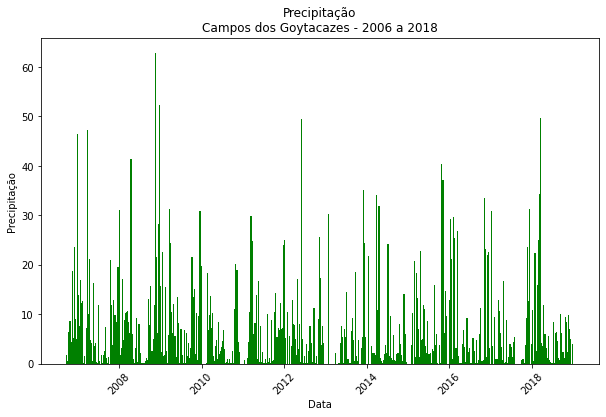

In [380]:

fig, ax = plt.subplots()
# add the x-axis and the y-axis to the plot
ax.bar(pddf_stella.index,
        pddf_stella["precip_total_hor"].values,
        color="green", width=10)

# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)

# set title and labels for axes
ax.set(xlabel = "Data",
       ylabel = "Precipitação",
       title = "Precipitação\nCampos dos Goytacazes - 2006 a 2018")

###Exercício 04
####Crie 4 gráficos em barras da pluviosidade de todo o período de dados disponível reamostrado nas formas:

1. horária
2. diária
3. mensal
4. anual

In [381]:
print(pddf_stella.index.min())
print(pddf_stella.index.max())

2006-09-25 00:00:00
2018-12-31 23:00:00


Reamostrar por dia, mês e ano:

In [382]:
#Exercício 04

# resample the data by total precipitation of each day
pddf_stella_daily = pddf_stella.resample("D").sum()

# resample the data by total precipitation of each day
pddf_stella_monthly = pddf_stella.resample("M").sum()

# resample the data by total precipitation of each day
pddf_stella_yearly = pddf_stella.resample("Y").sum()

In [383]:
print(pddf_stella_daily.precip_total_hor.head())
print(pddf_stella_monthly.precip_total_hor.head())
print(pddf_stella_yearly.precip_total_hor.head())

date_time
2006-09-25    4.2
2006-09-26    0.2
2006-09-27    0.8
2006-09-28    0.0
2006-09-29    0.0
Freq: D, Name: precip_total_hor, dtype: float64
date_time
2006-09-30      5.2
2006-10-31    122.6
2006-11-30    216.6
2006-12-31    132.2
2007-01-31    430.4
Freq: M, Name: precip_total_hor, dtype: float64
date_time
2006-12-31     476.6
2007-12-31    1114.8
2008-12-31    1761.2
2009-12-31    1102.6
2010-12-31     665.8
Freq: A-DEC, Name: precip_total_hor, dtype: float64


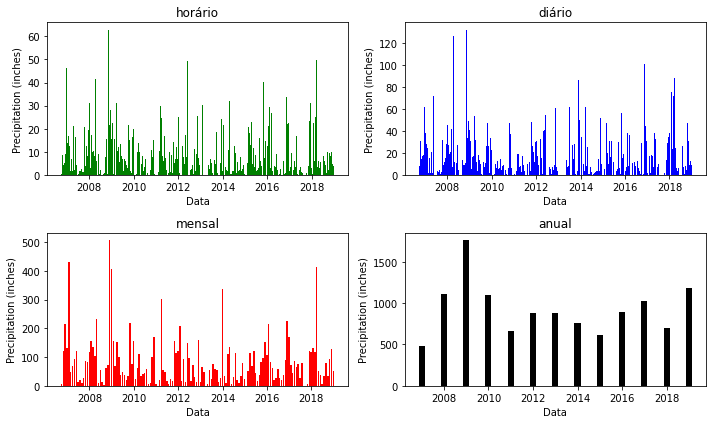

In [384]:
# exercício 04 - plots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.bar(pddf_stella.index,
           pddf_stella["precip_total_hor"].values,
           color= "green", width=10)
ax1.set(xlabel = "Data", 
        ylabel = "Precipitation (inches)",
        title = "horário")

ax2.bar(pddf_stella_daily.index,
           pddf_stella_daily["precip_total_hor"].values,
           color= "blue", width=10)
ax2.set(xlabel = "Data",
        ylabel = "Precipitation (inches)",
        title = "diário")

ax3.bar(pddf_stella_monthly.index,
           pddf_stella_monthly["precip_total_hor"].values,
           color= "red", width=25)
ax3.set(xlabel = "Data",
       ylabel = "Precipitation (inches)",
       title = "mensal")

ax4.bar(pddf_stella_yearly.index,
           pddf_stella_yearly["precip_total_hor"].values,
           color= "black", width=100)
ax4.set(xlabel = "Data",
       ylabel = "Precipitation (inches)",
       title = "anual")
plt.tight_layout()

--------


###Exercício 05

Faça gráficos horários e diários de precipitação (tipo barras) e temperatura (tipo linha - coluna TEMPERATURA DO AR - BULBO SECO, HORARIA), no mesmo plot, tanto para:

* o ano mais chuvoso
* o ano menos chuvoso

Observar qual o valor mínimo e máximo de precipitação:

In [385]:
pddf_stella_yearly.index.values

array(['2006-12-31T00:00:00.000000000', '2007-12-31T00:00:00.000000000',
       '2008-12-31T00:00:00.000000000', '2009-12-31T00:00:00.000000000',
       '2010-12-31T00:00:00.000000000', '2011-12-31T00:00:00.000000000',
       '2012-12-31T00:00:00.000000000', '2013-12-31T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000', '2015-12-31T00:00:00.000000000',
       '2016-12-31T00:00:00.000000000', '2017-12-31T00:00:00.000000000',
       '2018-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [386]:
#Retirar o ano de 2006 que está incompleto
pddf_stella_2 = pddf_stella_yearly["2007-01-01":"2018-12-31"]

In [387]:
pddf_stella_2.index.values

array(['2007-12-31T00:00:00.000000000', '2008-12-31T00:00:00.000000000',
       '2009-12-31T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-12-31T00:00:00.000000000', '2012-12-31T00:00:00.000000000',
       '2013-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2015-12-31T00:00:00.000000000', '2016-12-31T00:00:00.000000000',
       '2017-12-31T00:00:00.000000000', '2018-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [388]:
max=0
min=9999
for i in range(0, len(pddf_stella_2.index)):
  if pddf_stella_yearly.precip_total_hor[i] > max:
    max=pddf_stella_yearly.precip_total_hor[i]
    ano_maximo = pddf_stella_yearly.index.year[i]
    
  elif pddf_stella_yearly.precip_total_hor[i] < min:
     min=pddf_stella_yearly.precip_total_hor[i]
     ano_minimo = pddf_stella_yearly.index.year[i]
     
print("O ano mais chuvoso é", ano_maximo, "e o valor de precipitação é", max)
print("O ano menos chuvoso é", ano_minimo, "e o valor de precipitação é", min)

O ano mais chuvoso é 2008 e o valor de precipitação é 1761.2
O ano menos chuvoso é 2014 e o valor de precipitação é 612.0


Renomear a coluna de temperatura

In [389]:
#renomear a coluna de temperatura
pddf_stella = pddf_stella.rename(columns={"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)":"temp_hor"})

In [390]:
pddf_stella_2008 = pddf_stella["2008"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


In [391]:
pddf_stella_2014 = pddf_stella["2014"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


In [392]:
print(pddf_stella_2008.index.values)

['2008-01-01T00:00:00.000000000' '2008-01-01T01:00:00.000000000'
 '2008-01-01T02:00:00.000000000' ... '2008-12-31T21:00:00.000000000'
 '2008-12-31T22:00:00.000000000' '2008-12-31T23:00:00.000000000']


Obtenção dos valores diários de precipitação pela soma dos valores horários e criação de um novo dataframe:

In [393]:
# resample the data by total precipitation of each day
pddf_stella_daily_sum = pddf_stella.resample("D").sum()

Obtenção dos valores diários de temperatura pela média dos valores horários e criação de um novo dataframe:

In [394]:
# resample the data by total precipitation of each day
pddf_stella_daily_mean = pddf_stella.resample("D").mean()

Criando dataframes para 2008 (subset):

In [395]:
pddf_stella_daily_mean_2008 = pddf_stella_daily_mean["2008"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


In [396]:
pddf_stella_daily_sum_2008 = pddf_stella_daily_sum["2008"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


In [397]:
pddf_stella_daily_sum_2008

,precip_total_hor,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),temp_hor,TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
date_time,,,,,,,,,,,,,,,,,,
2008-01-01,0.0,24224.3,24228.6,24217.7,30613.4,613.1,470.6,629.6,598.3,480.9,458.8,1776.0,1642.0,1718.0,0.0,0.0,0.0,0.0
2008-01-02,0.0,24275.3,24279.1,24269.6,29594.1,617.2,462.6,628.7,604.3,474.8,450.0,1734.0,1608.0,1669.0,0.0,0.0,0.0,0.0
2008-01-03,0.0,24318.8,24324.1,24313.0,30612.1,631.6,478.1,645.3,618.7,490.0,464.9,1739.0,1596.0,1669.0,0.0,0.0,0.0,0.0
2008-01-04,0.0,24310.7,24317.6,24305.8,30910.8,632.4,445.5,648.2,618.6,458.1,432.0,1628.0,1486.0,1559.0,0.0,0.0,0.0,0.0
2008-01-05,0.0,24225.9,24234.3,24222.2,23373.8,631.6,447.7,649.2,614.6,458.8,434.8,1637.0,1483.0,1567.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-27,25.2,24181.9,24186.2,24175.1,6747.0,558.3,539.6,561.3,554.0,543.7,535.7,2302.0,2278.0,2289.0,4852.0,96.9,46.6,0.0
2008-12-28,7.2,24223.6,24228.3,24217.9,7744.3,559.4,536.4,564.2,554.7,540.7,532.0,2280.0,2248.0,2264.0,2767.0,88.3,46.2,0.0
2008-12-29,0.0,24211.1,24216.8,24206.0,17872.6,620.5,557.0,631.2,611.0,568.4,550.2,2117.0,2031.0,2069.0,2175.0,136.5,75.2,0.0


Criando dataframes para 2014 (subset):

In [398]:
pddf_stella_daily_mean_2014 = pddf_stella_daily_mean["2014"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


In [399]:
pddf_stella_daily_sum_2014 = pddf_stella_daily_sum["2014"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


#####Gráficos horários e diários de precipitação e temperatura do ano mais chuvoso (2008)

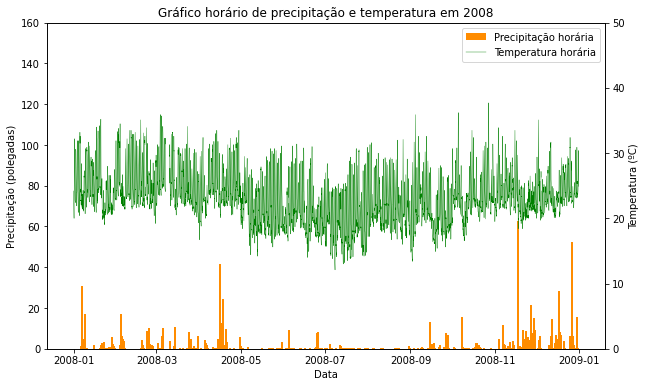

In [400]:
# exercício 5

#o ano mais chuvoso = 2008
#HORÁRIO
fig, ax1 = plt.subplots()
ax1.bar(pddf_stella_2008.index, pddf_stella_2008["precip_total_hor"], color= "darkorange",label = "Precipitação horária", width=1.5)
ax1.set(xlabel="Data")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(pddf_stella_2008["temp_hor"],
           color= "green",label = "Temperatura horária", linewidth=0.4)

ax1.set(ylabel='Precipitação (polegadas)')
ax2.set(ylabel='Temperatura (ºC)')
ax2.set(ylim=([0,50]))
ax1.set(ylim=([0,160]))
ax1.set(title="Gráfico horário de precipitação e temperatura em 2008")
lin1, lab1 = ax1.get_legend_handles_labels()
lin2, lab2 = ax2.get_legend_handles_labels()

ax1.legend((lin1+lin2), (lab1+lab2), loc=0)
plt.show()

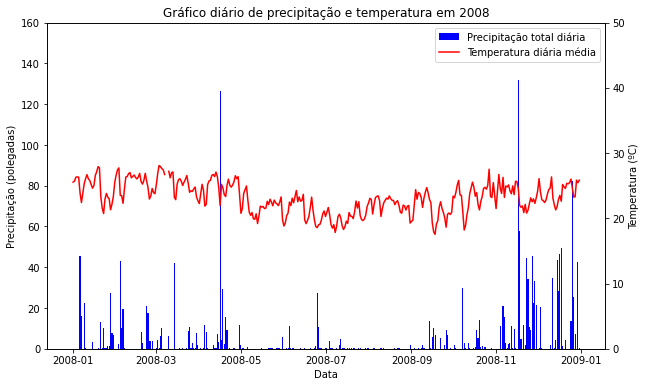

In [401]:
# exercício 5

#o ano mais chuvoso = 2008
#DIÁRIO
fig, ax1 = plt.subplots()
ax1.bar(pddf_stella_daily_sum_2008.index, pddf_stella_daily_sum_2008["precip_total_hor"], color= "blue",
        label = "Precipitação total diária")
ax1.set(xlabel="Data")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(pddf_stella_daily_mean_2008["temp_hor"],
           color= "red",
         label = "Temperatura diária média")

ax1.set(ylabel='Precipitação (polegadas)')
ax2.set(ylabel='Temperatura (ºC)')
ax2.set(ylim=([0,50]))
ax1.set(ylim=([0,160]))
ax1.set(title="Gráfico diário de precipitação e temperatura em 2008")
lin1, lab1 = ax1.get_legend_handles_labels()
lin2, lab2 = ax2.get_legend_handles_labels()

ax1.legend((lin1+lin2), (lab1+lab2), loc=0)

plt.show()

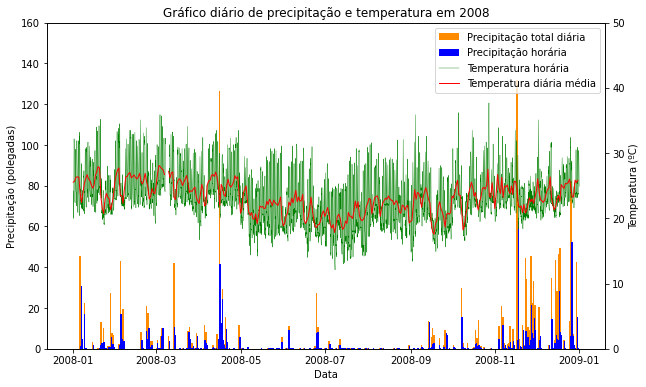

In [402]:
# exercício 5

#o ano mais chuvoso = 2008
#DIÁRIO
fig, ax1 = plt.subplots()
ax1.bar(pddf_stella_daily_sum_2008.index, pddf_stella_daily_sum_2008["precip_total_hor"], 
        color= "darkorange",label = "Precipitação total diária", width=1)

ax1.bar(pddf_stella_2008.index, pddf_stella_2008["precip_total_hor"], 
        color= "blue",label = "Precipitação horária", width=1)

ax1.set(xlabel="Data")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(pddf_stella_2008["temp_hor"],
           color= "green",label = "Temperatura horária", linewidth=0.4)
ax2.plot(pddf_stella_daily_mean_2008["temp_hor"],
           color= "red",label = "Temperatura diária média", linewidth=1)

ax1.set(ylabel='Precipitação (polegadas)')
ax2.set(ylabel='Temperatura (ºC)')
ax2.set(ylim=([0,50]))
ax1.set(ylim=([0,160]))
ax1.set(title="Gráfico diário de precipitação e temperatura em 2008")

#
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc=0)
#
plt.show()

#####Gráficos horários e diários de precipitação e temperatura do ano menos chuvoso (2014)

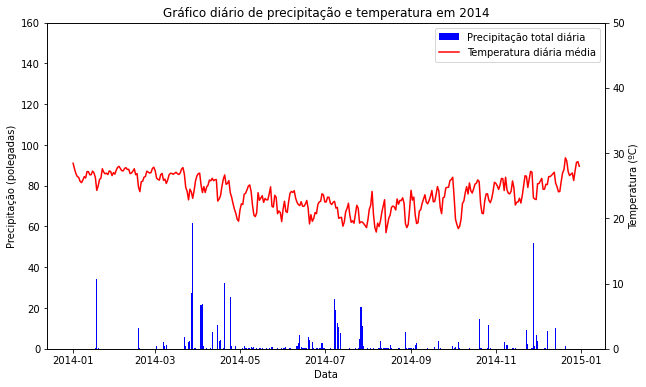

In [403]:
# exercício 5

#o ano menos chuvoso = 2014
# DIÁRIO
fig, ax = plt.subplots()
ax.bar(pddf_stella_daily_sum_2014.index, pddf_stella_daily_sum_2014["precip_total_hor"], 
       color= "blue",label = "Precipitação total diária")
ax.set(xlabel="Data")

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(pddf_stella_daily_mean_2014["temp_hor"],
           color= "red",label = "Temperatura diária média")

ax.set(ylabel='Precipitação (polegadas)')
ax2.set(ylabel='Temperatura (ºC)')
ax2.set(ylim=([0,50]))
ax.set(ylim=([0,160]))
ax.set(title="Gráfico diário de precipitação e temperatura em 2014")

lin1, lab1 = ax.get_legend_handles_labels()
lin2, lab2 = ax2.get_legend_handles_labels()

ax.legend((lin1+lin2), (lab1+lab2), loc=0)
plt.show()

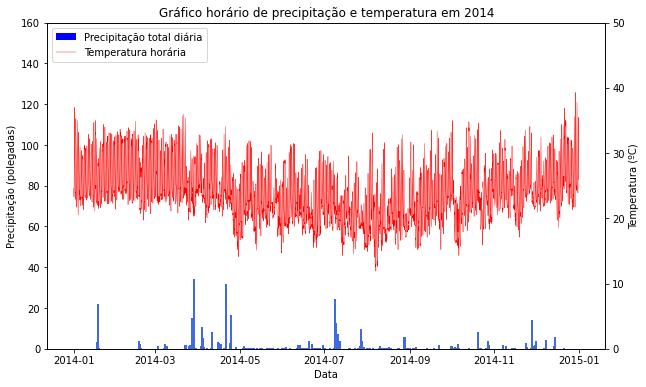

In [404]:
# exercício 5

#o ano menos chuvoso= 2014
#HORÁRIO
fig, ax1 = plt.subplots()
ax1.bar(pddf_stella_2014.index, pddf_stella_2014["precip_total_hor"], 
        color= "royalblue",label = "Precipitação horária", width=1.5)
ax1.set(xlabel="Data")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(pddf_stella_2014["temp_hor"],
           color= "red",label = "Temperatura horária", linewidth=0.4)

ax1.set(ylabel='Precipitação (polegadas)')
ax2.set(ylabel='Temperatura (ºC)')
ax2.set(ylim=([0,50]))
ax1.set(ylim=([0,160]))
ax1.set(title="Gráfico horário de precipitação e temperatura em 2014")
lin1, lab1 = ax.get_legend_handles_labels()
lin2, lab2 = ax2.get_legend_handles_labels()

ax1.legend((lin1+lin2), (lab1+lab2), loc=0)
plt.show()

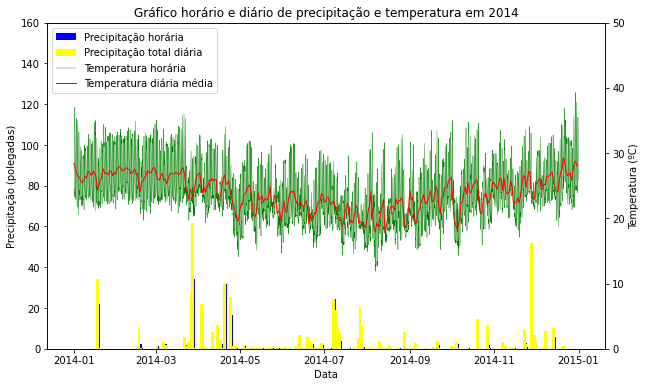

In [405]:
# exercício 5

#o ano menos chuvoso = 2014

fig, ax1 = plt.subplots()
ax1.bar(pddf_stella_2014.index, pddf_stella_2014["precip_total_hor"], 
        color= "blue",label = "Precipitação horária",width=2)
ax1.bar(pddf_stella_daily_sum_2014.index, pddf_stella_daily_sum_2014["precip_total_hor"], 
        color= "yellow",label = "Precipitação total diária",width=2 )
ax1.set(xlabel="Data")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(pddf_stella_2014["temp_hor"],
           color= "green",label = "Temperatura horária", linewidth=0.4)
ax2.plot(pddf_stella_daily_mean_2014["temp_hor"],
           color= "red",label = "Temperatura diária média", linewidth=1)

ax1.set(ylabel='Precipitação (polegadas)')
ax2.set(ylabel='Temperatura (ºC)')
ax2.set(ylim=([0,50]))
ax1.set(ylim=([0,160]))
ax1.set(title="Gráfico horário e diário de precipitação e temperatura em 2014")

lin1, lab1 = ax1.get_legend_handles_labels()
lin2, lab2 = ax2.get_legend_handles_labels()

ax1.legend((lin1+lin2), (lab1+lab2), loc=0)
plt.show()


## Parte 2 - vazão e período de retorno

Usar pandas para abrir e processar data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.txt. 

Criar um gráfico de máxima vazão mensal de 1990-2014.

In [406]:
# install necessary packages
!pip install hydrofunctions

In [407]:
import hydrofunctions as hf

In [408]:
# Set working directory
# os.chdir
os.chdir('/content') 

###Plot 1

Abrir e processar arquivo txt data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.txt.

Criar plot de máxima vazão mensal de 1990 a 2014.


In [409]:
# inputs
filename = "data/colorado-flood.zip"
url = "https://ndownloader.figshare.com/files/16371473"

In [410]:
# Download the data
urllib.request.urlretrieve(url = url, filename = filename)

('data/colorado-flood.zip', <http.client.HTTPMessage at 0x7f6fec950ed0>)

Função read_my_zip para unzip os arquivos e importar como pandas_df

In [411]:
def read_my_zip( file_zip, file_csv, **kwargs):
    """Read one single file within the zip file with pandas_read_csv()

    Parameters
    ----------
    file_zip : str
        The zip file location
    file_csv : str
        The csv target-file within the zip file
    kwargs   : , optional
        Arguments for pandas.read_csv()

    Returns
    -------
    pandas DataFrame

    """
    with zipfile.ZipFile(file_zip) as z:
      with z.open(file_csv) as f:
        data = pd.read_csv(f,**kwargs)
       
    return data

In [412]:
path_csv = "discharge/06730200-discharge-daily-1986-2013.txt"
boulder_discharge_1986_2013 = read_my_zip(filename, path_csv,
                                          sep="\t", comment='#',header=[0,1], parse_dates=[2])
boulder_discharge_1986_2013.describe()

,site_no,17663_00060_00003
,15s,14n
count,9954.0,9954.000000
mean,6730200.0,93.712645
std,0.0,143.942426
min,6730200.0,0.870000
25%,6730200.0,32.000000
50%,6730200.0,54.000000
75%,6730200.0,108.000000
max,6730200.0,4770.000000


In [413]:
path_csv = "discharge/06730200-discharge-daily-1986-2013.txt"
boulder_discharge_1986_2013 = read_my_zip(filename, path_csv,
                                          sep="\t", comment='#',header=[0,1], parse_dates=[2])
boulder_discharge_1986_2013.head()

,agency_cd,site_no,datetime,17663_00060_00003,17663_00060_00003_cd
,5s,15s,20d,14n,10s
0,USGS,6730200,1986-10-01,30.0,A
1,USGS,6730200,1986-10-02,30.0,A
2,USGS,6730200,1986-10-03,30.0,A
3,USGS,6730200,1986-10-04,30.0,A
4,USGS,6730200,1986-10-05,30.0,A


In [414]:
# retirar uma linha do cabeçalho
boulder_discharge_1986_2013.columns = boulder_discharge_1986_2013.columns.droplevel(1)
# definir a coluna de data como índice
boulder_discharge_1986_2013 = boulder_discharge_1986_2013.set_index(['datetime'])

# ver primeiras linhas
boulder_discharge_1986_2013.head()

,agency_cd,site_no,17663_00060_00003,17663_00060_00003_cd
datetime,,,,
1986-10-01,USGS,6730200,30.0,A
1986-10-02,USGS,6730200,30.0,A
1986-10-03,USGS,6730200,30.0,A
1986-10-04,USGS,6730200,30.0,A
1986-10-05,USGS,6730200,30.0,A


In [415]:
#mudar título das colunas
boulder_discharge_1986_2013.columns=["agency_cd", "site_no", "disValue", "qualCode"]
print(boulder_discharge_1986_2013.head())
print(boulder_discharge_1986_2013.tail())

           agency_cd  site_no  disValue qualCode
datetime                                        
1986-10-01      USGS  6730200      30.0        A
1986-10-02      USGS  6730200      30.0        A
1986-10-03      USGS  6730200      30.0        A
1986-10-04      USGS  6730200      30.0        A
1986-10-05      USGS  6730200      30.0        A
           agency_cd  site_no  disValue qualCode
datetime                                        
2013-12-27      USGS  6730200      38.0        A
2013-12-28      USGS  6730200      32.0        A
2013-12-29      USGS  6730200      31.0        A
2013-12-30      USGS  6730200      30.0        A
2013-12-31      USGS  6730200      31.0        A


In [416]:
#definir intervalo de tempo de 1990 a 2014
boulder_discharge_1990_2014 = boulder_discharge_1986_2013["1990":"2014"]

In [417]:
print(boulder_discharge_1990_2014)


           agency_cd  site_no  disValue qualCode
datetime                                        
1990-01-01      USGS  6730200      51.0        A
1990-01-02      USGS  6730200      51.0        A
1990-01-03      USGS  6730200      53.0        A
1990-01-04      USGS  6730200      46.0        A
1990-01-05      USGS  6730200      47.0        A
...              ...      ...       ...      ...
2013-12-27      USGS  6730200      38.0        A
2013-12-28      USGS  6730200      32.0        A
2013-12-29      USGS  6730200      31.0        A
2013-12-30      USGS  6730200      30.0        A
2013-12-31      USGS  6730200      31.0        A

[8766 rows x 4 columns]


In [418]:
#Estatística descritiva
boulder_discharge_1990_2014.describe()

,site_no,disValue
count,8766.0,8766.000000
mean,6730200.0,94.462545
std,0.0,150.920510
min,6730200.0,0.870000
25%,6730200.0,30.000000
50%,6730200.0,53.000000
75%,6730200.0,107.000000
max,6730200.0,4770.000000


Reamostrar por valor máximo mensal

In [419]:
boulder_discharge_1990_2014.monthly = boulder_discharge_1990_2014.resample("m").max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [420]:
boulder_discharge_1990_2014.monthly

,agency_cd,site_no,disValue,qualCode
datetime,,,,
1990-01-31,USGS,6730200,56.0,A
1990-02-28,USGS,6730200,53.0,A
1990-03-31,USGS,6730200,99.0,A
1990-04-30,USGS,6730200,263.0,A
1990-05-31,USGS,6730200,253.0,A
...,...,...,...,...
2013-08-31,USGS,6730200,108.0,A
2013-09-30,USGS,6730200,4770.0,A
2013-10-31,USGS,6730200,424.0,A


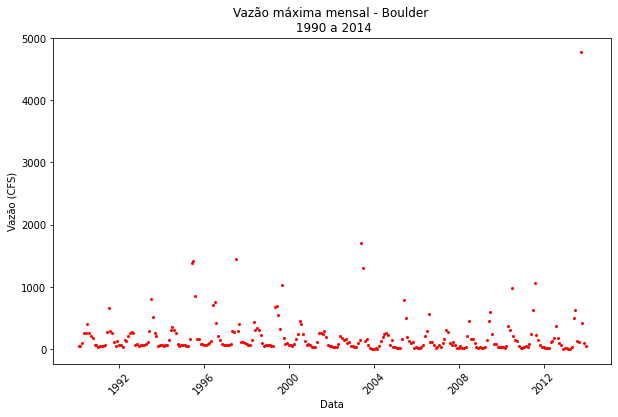

In [421]:
# plot using matplotlib
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x=boulder_discharge_1990_2014.monthly.index, 
        y=boulder_discharge_1990_2014.monthly["disValue"], 
        marker="o",
        s=4, 
        color ="red")
ax.set_xlabel("Data")
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Vazão (CFS)")
ax.set_title("Vazão máxima mensal - Boulder \n 1990 a 2014")
plt.show()

###Plot 2

Criar um gráfico de vazão máxima diária de 01/08/2013 a 01/10/2013.

In [422]:
#Definir intervalo de 01/08/2013 a 01/10/2013
boulder_discharge_AugOCt_2013 = boulder_discharge_1986_2013["2013-08-01":"2013-10-01"]
print(boulder_discharge_AugOCt_2013)

           agency_cd  site_no  disValue qualCode
datetime                                        
2013-08-01      USGS  6730200      64.0        A
2013-08-02      USGS  6730200      68.0        A
2013-08-03      USGS  6730200      65.0        A
2013-08-04      USGS  6730200      65.0        A
2013-08-05      USGS  6730200      62.0        A
...              ...      ...       ...      ...
2013-09-27      USGS  6730200     473.0        A
2013-09-28      USGS  6730200     460.0        A
2013-09-29      USGS  6730200     371.0        A
2013-09-30      USGS  6730200     354.0        A
2013-10-01      USGS  6730200     308.0        A

[62 rows x 4 columns]


In [423]:
#Reamostrar por valor máximo diário de vazão
boulder_discharge_AugOCt_2013_maxdaily=boulder_discharge_AugOCt_2013.resample("D").max()

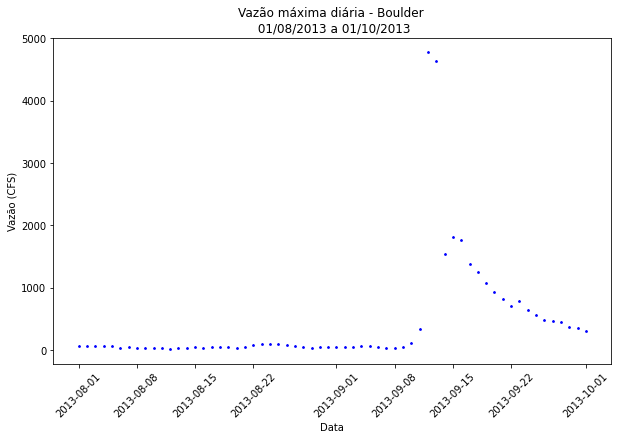

In [424]:
# plot using matplotlib
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x=boulder_discharge_AugOCt_2013_maxdaily.index, 
        y=boulder_discharge_AugOCt_2013_maxdaily["disValue"], 
        marker="p",
        s=4, 
        color ="blue")
ax.set_xlabel("Data")
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Vazão (CFS)")
ax.set_title("Vazão máxima diária - Boulder \n 01/08/2013 a 01/10/2013")
plt.show()

###Plot 3

Usar arquivo data/precipitation/805333-precip-daily-1948-2013.csv.

Criar gráfico da soma total de precipitação mensal de 1990 a 2014.

In [425]:
path_csv = "precipitation/805333-precip-daily-1948-2013.csv"
boulder_precip_1948_2013 = read_my_zip(filename, path_csv)
boulder_precip_1948_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480801 01:00,0.00,g,
1,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480802 15:00,0.05,,
2,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480803 09:00,0.01,,
3,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480803 14:00,0.03,,
4,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480803 15:00,0.03,,


In [426]:
boulder_precip_1948_2013.describe()

,HPCP
count,14476.000000
mean,27.781170
std,164.105317
min,0.000000
25%,0.020000
50%,0.100000
75%,0.100000
max,999.990000


In [427]:
path_csv = "precipitation/805333-precip-daily-1948-2013.csv"
boulder_precip_1948_2013 = read_my_zip(filename, path_csv,
                                       # Make sure the dates import in datetime format
                                       parse_dates = ["DATE"],
                                       # Set DATE as the index so you can subset data by time period
                                       index_col = ["DATE"],
                                       # Mask no data values so they are not plotted / used in analysis
                                       na_values = ["999.99"])
boulder_precip_1948_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
1948-08-01 01:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.00,g,
1948-08-02 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.05,,
1948-08-03 09:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.01,,
1948-08-03 14:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,
1948-08-03 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,


In [428]:
boulder_precip_1948_2013.describe()

,HPCP
count,14075.000000
mean,0.082716
std,0.115928
min,0.000000
25%,0.020000
50%,0.100000
75%,0.100000
max,2.720000


In [429]:
boulder_precip_1948_2013.columns

Index(['STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'HPCP',
       'Measurement Flag', 'Quality Flag'],
      dtype='object')

In [430]:
#Definir intervalo
boulder_precip_1990_2014 = boulder_precip_1948_2013["1990":"2014"]

In [431]:
print(boulder_precip_1990_2014.head())

                         STATION     STATION_NAME ELEVATION  LATITUDE  \
DATE                                                                    
1990-01-01 01:00:00  COOP:050843  BOULDER 2 CO US    1650.5  40.03333   
1990-01-17 21:00:00  COOP:050843  BOULDER 2 CO US    1650.5  40.03333   
1990-01-17 22:00:00  COOP:050843  BOULDER 2 CO US    1650.5  40.03333   
1990-01-19 08:00:00  COOP:050843  BOULDER 2 CO US    1650.5  40.03333   
1990-01-19 10:00:00  COOP:050843  BOULDER 2 CO US    1650.5  40.03333   

                      LONGITUDE  HPCP Measurement Flag Quality Flag  
DATE                                                                 
1990-01-01 01:00:00  -105.26667   0.0                g               
1990-01-17 21:00:00  -105.26667   0.2                                
1990-01-17 22:00:00  -105.26667   0.1                                
1990-01-19 08:00:00  -105.26667   0.1                                
1990-01-19 10:00:00  -105.26667   0.1                               

In [432]:
#Reamostrar por soma total mensal
boulder_precip_1990_2014_month = boulder_precip_1990_2014.resample("M").sum()

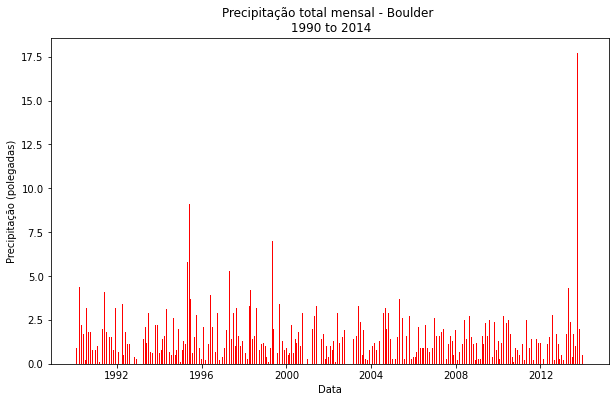

In [433]:
# plot using matplotlib
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(boulder_precip_1990_2014_month .index, 
        boulder_precip_1990_2014_month["HPCP"], 
        color ="red", width= 15)
ax.set_xlabel("Data")
ax.set_ylabel("Precipitação (polegadas)")
ax.set_title("Precipitação total mensal - Boulder \n 1990 to 2014")
plt.show()

### Plot 4

Criar um gráfico de precipitação diária total entre 01/08 a 01/10/2013.

In [434]:
path_csv = "precipitation/805333-precip-daily-1948-2013.csv"
boulder_precip_1948_2013 = read_my_zip(filename, path_csv)
print(boulder_precip_1948_2013.head())

       STATION     STATION_NAME ELEVATION LATITUDE LONGITUDE            DATE  \
0  COOP:050843  BOULDER 2 CO US   unknown  unknown   unknown  19480801 01:00   
1  COOP:050843  BOULDER 2 CO US   unknown  unknown   unknown  19480802 15:00   
2  COOP:050843  BOULDER 2 CO US   unknown  unknown   unknown  19480803 09:00   
3  COOP:050843  BOULDER 2 CO US   unknown  unknown   unknown  19480803 14:00   
4  COOP:050843  BOULDER 2 CO US   unknown  unknown   unknown  19480803 15:00   

   HPCP Measurement Flag Quality Flag  
0  0.00                g               
1  0.05                                
2  0.01                                
3  0.03                                
4  0.03                                


In [435]:
path_csv = "precipitation/805333-precip-daily-1948-2013.csv"
boulder_precip_1948_2013 = read_my_zip(filename, path_csv,
                                       # Make sure the dates import in datetime format
                                       parse_dates = ["DATE"],
                                       # Set DATE as the index so you can subset data by time period
                                       index_col = ["DATE"],
                                       # Mask no data values so they are not plotted / used in analysis
                                       na_values = ["999.99"])
print(boulder_precip_1948_2013.head())

                         STATION     STATION_NAME ELEVATION LATITUDE  \
DATE                                                                   
1948-08-01 01:00:00  COOP:050843  BOULDER 2 CO US   unknown  unknown   
1948-08-02 15:00:00  COOP:050843  BOULDER 2 CO US   unknown  unknown   
1948-08-03 09:00:00  COOP:050843  BOULDER 2 CO US   unknown  unknown   
1948-08-03 14:00:00  COOP:050843  BOULDER 2 CO US   unknown  unknown   
1948-08-03 15:00:00  COOP:050843  BOULDER 2 CO US   unknown  unknown   

                    LONGITUDE  HPCP Measurement Flag Quality Flag  
DATE                                                               
1948-08-01 01:00:00   unknown  0.00                g               
1948-08-02 15:00:00   unknown  0.05                                
1948-08-03 09:00:00   unknown  0.01                                
1948-08-03 14:00:00   unknown  0.03                                
1948-08-03 15:00:00   unknown  0.03                                


In [436]:
#Definir intervalo
boulder_precip_AugOCt_2013 = boulder_precip_1948_2013["2013-08-01":"2013-10-01"]
print(boulder_precip_AugOCt_2013.head())

                         STATION     STATION_NAME ELEVATION LATITUDE  \
DATE                                                                   
2013-08-01 01:00:00  COOP:050843  BOULDER 2 CO US    1650.5  40.0338   
2013-08-01 15:00:00  COOP:050843  BOULDER 2 CO US    1650.5  40.0338   
2013-08-05 15:00:00  COOP:050843  BOULDER 2 CO US    1650.5  40.0338   
2013-08-06 15:00:00  COOP:050843  BOULDER 2 CO US    1650.5  40.0338   
2013-08-10 17:00:00  COOP:050843  BOULDER 2 CO US    1650.5  40.0338   

                     LONGITUDE  HPCP Measurement Flag Quality Flag  
DATE                                                                
2013-08-01 01:00:00  -105.2811   0.0                g               
2013-08-01 15:00:00  -105.2811   0.1                                
2013-08-05 15:00:00  -105.2811   0.1                                
2013-08-06 15:00:00  -105.2811   0.1                                
2013-08-10 17:00:00  -105.2811   0.2                                


In [437]:
#Reamostrar por soma diária
boulder_precip_AugOCt_2013.daily= boulder_precip_AugOCt_2013.resample("D").sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


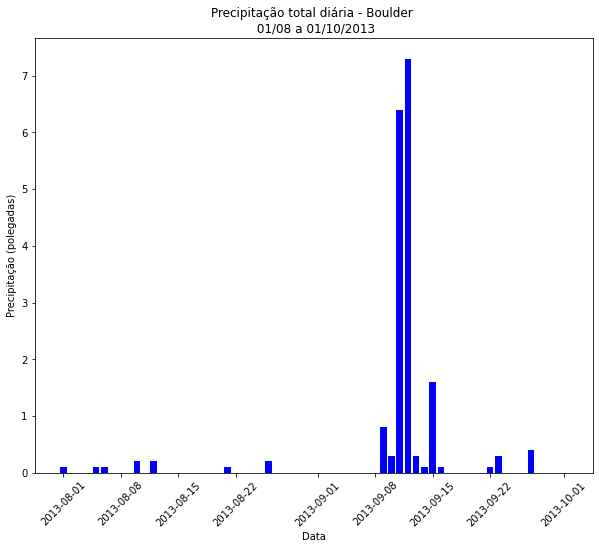

In [438]:
# plot using matplotlib
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(boulder_precip_AugOCt_2013.daily.index, 
       boulder_precip_AugOCt_2013.daily["HPCP"], 
        color ="blue", width=0.8)
ax.set_xlabel("Data")
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Precipitação (polegadas)")
ax.set_title("Precipitação total diária - Boulder \n 01/08 a 01/10/2013")
plt.show()

-------
##Return function

Adicione documentação à função abaixo, incluindo:

* Uma visão geral do que a função faz
* Os parâmetros que a função recebe como entrada(s)
* O que a função retorna

In [439]:
# Create a function from the workflow below

# add an argument for annual vs daily...


def calculate_return(df, colname):
    '''
    """Calcula o período de retorno (em anos) a partir de uma variável 
     dentro de um pandas dataframe

    Parameters
    ----------
    df : pandas dataframe 
      
    colname : nome da coluna que contém os dados para os quais serão 
    realizados os calculos de período de retorno

    Returns
    -------
    pandas DataFrame

    """

    '''
    sorted_data = df.sort_values(by=colname)
    n = sorted_data.shape[0]
    sorted_data.insert(0, 'rank', range(1, 1 + n))
    sorted_data["probability"] = (n - sorted_data["rank"] + 1) / (n + 1)
    sorted_data["return-years"] = (1 / sorted_data["probability"])

    return(sorted_data)

------------

## Plot 5a & b - Período de retorno para a vazão

### Passo 1

Usar a hydrofunctions para importar o valor diário de vazão do site USGS: 06730500 

site = "06730500" start = '1946-05-10' end = '2018-08-29'.

Calcular a vazão máxima anual.

In [440]:
# define the site number and start and end dates that you are interested in
site = "06730500"
start = '1946-05-10'
end = '2018-08-29'

# then request data for that site and time period 
boulder_resp_1946_2018 = hf.get_nwis(site, 'dv', start, end, parameterCd='00060')
#dv é valor diário - iv - instantaneous values

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730500&parameterCd=00060&startDT=1946-05-10&endDT=2018-08-29


In [441]:
# hf.get_nwis_property(boulder_resp)
# get metadata about the data
hf.get_nwis(site, 'dv').json()

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730500


{'declaredType': 'org.cuahsi.waterml.TimeSeriesResponseType',
 'globalScope': True,
 'name': 'ns1:timeSeriesResponseType',
 'nil': False,
 'scope': 'javax.xml.bind.JAXBElement$GlobalScope',
 'typeSubstituted': False,
 'value': {'queryInfo': {'criteria': {'locationParam': '[ALL:06730500]',
    'parameter': [],
    'variableParam': 'ALL'},
   'note': [{'title': 'filter:sites', 'value': '[ALL:06730500]'},
    {'title': 'filter:timeRange',
     'value': '[mode=LATEST, modifiedSince=null]'},
    {'title': 'filter:methodId', 'value': 'methodIds=[ALL]'},
    {'title': 'requestDT', 'value': '2022-05-23T00:22:57.489Z'},
    {'title': 'requestId', 'value': '7ef37d00-da2e-11ec-b157-005056beda50'},
    {'title': 'disclaimer',
     'value': 'Provisional data are subject to revision. Go to http://waterdata.usgs.gov/nwis/help/?provisional for more information.'},
    {'title': 'server', 'value': 'caas01'}],
   'queryURL': 'http://waterservices.usgs.gov/nwis/dv/format=json%2C1.1&sites=06730500'},
  't

In [442]:
# get the data in a pandas dataframe format
boulder_discharge_1946_2018 = hf.extract_nwis_df(boulder_resp_1946_2018.json()) #retorna um tuple
# vendo boulder_discharge[0]
# observa-se que contém um pd df,e  na posição 1 tem um tuple, então separa o pd df em um novo arquivo

boulder_discharge_1946_2018 = boulder_discharge_1946_2018[0] 
boulder_discharge_1946_2018.head()

,USGS:06730500:00060:00003,USGS:06730500:00060:00003_qualifiers
datetimeUTC,,
1946-05-10 00:00:00+00:00,16.0,A
1946-05-11 00:00:00+00:00,19.0,A
1946-05-12 00:00:00+00:00,9.0,A
1946-05-13 00:00:00+00:00,3.0,A
1946-05-14 00:00:00+00:00,7.8,A


In [443]:
# rename columns
boulder_discharge_1946_2018.columns = ["discharge", "flag"]
# view first 5 rows
boulder_discharge_1946_2018.head()

,discharge,flag
datetimeUTC,,
1946-05-10 00:00:00+00:00,16.0,A
1946-05-11 00:00:00+00:00,19.0,A
1946-05-12 00:00:00+00:00,9.0,A
1946-05-13 00:00:00+00:00,3.0,A
1946-05-14 00:00:00+00:00,7.8,A


In [444]:
# adicionar coluna de ano ao df
boulder_discharge_1946_2018["ano"]=boulder_discharge_1946_2018.index.year
# are there any years that have two entries?
boulder_discharge_1946_2018[boulder_discharge_1946_2018.duplicated(subset="ano")==True]

,discharge,flag,ano
datetimeUTC,,,
1946-05-11 00:00:00+00:00,19.00,A,1946
1946-05-12 00:00:00+00:00,9.00,A,1946
1946-05-13 00:00:00+00:00,3.00,A,1946
1946-05-14 00:00:00+00:00,7.80,A,1946
1946-05-15 00:00:00+00:00,7.40,A,1946
...,...,...,...
2018-08-25 00:00:00+00:00,9.86,A,2018
2018-08-26 00:00:00+00:00,7.02,A,2018
2018-08-27 00:00:00+00:00,4.05,A,2018


In [445]:
# Calcular maximo anual reamostrando
boulder_discharge_annual_max = boulder_discharge_1946_2018.resample('AS').max()
boulder_discharge_annual_max.head()

,discharge,flag,ano
datetimeUTC,,,
1946-01-01 00:00:00+00:00,99.0,A,1946
1947-01-01 00:00:00+00:00,1930.0,A,1947
1948-01-01 00:00:00+00:00,339.0,A,1948
1949-01-01 00:00:00+00:00,2010.0,hf.missing,1949
1950-01-01 00:00:00+00:00,NaN,hf.missing,1950


### Passo 2

Download dos picos de vazão anual máximos do site USGS.

In [446]:
#Escolher e criar diretório
os.chdir('/content/data') 
os.mkdir('colorado-flood')

FileExistsError: ignored

In [447]:
#Escolher e criar diretório
os.chdir('/content/data/colorado-flood') 
os.mkdir('downloads')

FileExistsError: ignored

In [448]:
# download usgs annual max data from figshare
url = "https://nwis.waterdata.usgs.gov/nwis/peak?site_no=06730500&agency_cd=USGS&format=rdb"
download_path = "downloads/annual-peak-flow.txt"

urllib.request.urlretrieve( url, download_path)

('downloads/annual-peak-flow.txt', <http.client.HTTPMessage at 0x7f6fb9e25cd0>)

In [449]:
usgs_annual_max = pd.read_csv(download_path, 
                           sep="\t",
                         comment='#',
                           header=[0,1],
                          parse_dates= [2])
usgs_annual_max

,agency_cd,site_no,peak_dt,peak_tm,peak_va,peak_cd,gage_ht,gage_ht_cd,year_last_pk,ag_dt,ag_tm,ag_gage_ht,ag_gage_ht_cd
,5s,15s,10d,6s,8s,33s,8s,27s,4s,10d,6s,8s,27s
0,USGS,6730500,1927-07-29,06:00,407.0,5,3.00,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,6730500,1928-06-04,09:00,694.0,5,3.84,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,6730500,1929-07-23,15:00,530.0,5,3.40,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,6730500,1930-08-18,05:00,353.0,5,2.94,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,6730500,1931-05-29,09:00,369.0,5,2.88,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,USGS,6730500,2017-05-19,01:45,1420.0,5,13.67,NaN,NaN,NaN,NaN,NaN,NaN
66,USGS,6730500,2018-05-03,18:30,666.0,5,11.76,2.0,NaN,2018-06-19,1815.0,12.09,NaN
67,USGS,6730500,2019-07-06,11:00,680.0,5,12.38,NaN,NaN,NaN,NaN,NaN,NaN


In [450]:
# retirar um nível do índice
usgs_annual_max.columns = usgs_annual_max.columns.droplevel(1)
# definir a coluna de data como o índice
usgs_annual_max = usgs_annual_max.set_index(['peak_dt'])

# remover colunas que nao serão utilizadas
usgs_annual_max = usgs_annual_max.drop(["gage_ht_cd", "year_last_pk","ag_dt", "ag_gage_ht", "ag_tm", "ag_gage_ht_cd"], axis=1)

# dataframe "clean"
usgs_annual_max.head()

,agency_cd,site_no,peak_tm,peak_va,peak_cd,gage_ht
peak_dt,,,,,,
1927-07-29,USGS,6730500,06:00,407.0,5,3.00
1928-06-04,USGS,6730500,09:00,694.0,5,3.84
1929-07-23,USGS,6730500,15:00,530.0,5,3.40
1930-08-18,USGS,6730500,05:00,353.0,5,2.94
1931-05-29,USGS,6730500,09:00,369.0,5,2.88


In [451]:
# adicionar uma coluna de ano aos dados 
usgs_annual_max["year"] = usgs_annual_max.index.year

# checar se existem anos que têm duas entradas
usgs_annual_max[usgs_annual_max.duplicated(subset="year")==True]

,agency_cd,site_no,peak_tm,peak_va,peak_cd,gage_ht,year
peak_dt,,,,,,,
1947-10-15,USGS,6730500,NaN,721.0,5,3.55,1947
1993-10-18,USGS,6730500,NaN,497.0,5,2.76,1993


In [452]:
# remover duplicata de anos 
usgs_annual_max = usgs_annual_max.sort_values('peak_va', ascending=False).drop_duplicates('year').sort_index()
# se não apresentar resultados a operação foi bem sucedida para remoção de duplicatas
usgs_annual_max[usgs_annual_max.duplicated(subset="year")==True]

,agency_cd,site_no,peak_tm,peak_va,peak_cd,gage_ht,year
peak_dt,,,,,,,


### Passo 3

Usar função calculate_return para calcular o tempo de retorno dos dados máximos anuais que foram calculados (boulder_discharge_annual_max) e os dados que foram baixados (usgs_annual_max).

In [453]:
#Calcular retorno para os dados máximos calculados (baseado nos dados médios diários)
boulder_prob = calculate_return(boulder_discharge_annual_max, "discharge")
boulder_prob

,rank,discharge,flag,ano,probability,return-years
datetimeUTC,,,,,,
1954-01-01 00:00:00+00:00,1,20.0,A,1954,0.986486,1.013699
1946-01-01 00:00:00+00:00,2,99.0,A,1946,0.972973,1.027778
2002-01-01 00:00:00+00:00,3,106.0,"A,e",2002,0.959459,1.042254
1978-01-01 00:00:00+00:00,4,110.0,hf.missing,1978,0.945946,1.057143
1991-01-01 00:00:00+00:00,5,125.0,hf.missing,1991,0.932432,1.072464
...,...,...,...,...,...,...
1973-01-01 00:00:00+00:00,69,NaN,hf.missing,1973,0.067568,14.800000
1974-01-01 00:00:00+00:00,70,NaN,hf.missing,1974,0.054054,18.500000
1975-01-01 00:00:00+00:00,71,NaN,hf.missing,1975,0.040541,24.666667


In [454]:
boulder_prob.describe()

,rank,discharge,ano,probability,return-years
count,73.000000,50.000000,73.000000,73.000000,73.000000
mean,37.000000,914.160000,1982.000000,0.500000,4.941283
std,21.217131,1273.346168,21.217131,0.286718,9.965753
min,1.000000,20.000000,1946.000000,0.013514,1.013699
25%,19.000000,354.750000,1964.000000,0.256757,1.345455
50%,37.000000,575.500000,1982.000000,0.500000,2.000000
75%,55.000000,1122.500000,2000.000000,0.743243,3.894737
max,73.000000,8910.000000,2018.000000,0.986486,74.000000


In [455]:
#Calcular retorno para os dados baixados da USGS 
usgs_anual_prob = calculate_return(usgs_annual_max, "peak_va")
usgs_anual_prob

,rank,agency_cd,site_no,peak_tm,peak_va,peak_cd,gage_ht,year,probability,return-years
peak_dt,,,,,,,,,,
1954-01-14,1,USGS,6730500,12:30,26.0,"2,5",NaN,1954,0.985507,1.014706
1932-07-13,2,USGS,6730500,10:00,128.0,5,1.86,1932,0.971014,1.029851
1940-07-03,3,USGS,6730500,NaN,174.0,5,2.34,1940,0.956522,1.045455
1946-07-19,4,USGS,6730500,NaN,178.0,5,2.39,1946,0.942029,1.061538
2002-05-24,5,USGS,6730500,09:15,238.0,5,2.60,2002,0.927536,1.078125
...,...,...,...,...,...,...,...,...,...,...
1983-05-19,64,USGS,6730500,NaN,2090.0,5,4.82,1983,0.072464,13.800000
2015-05-09,65,USGS,6730500,11:30,2240.0,5,15.36,2015,0.057971,17.250000
1995-05-17,66,USGS,6730500,NaN,2300.0,5,5.29,1995,0.043478,23.000000


In [456]:
usgs_anual_prob.describe()

,rank,site_no,peak_va,gage_ht,year,probability,return-years
count,68.00000,68.0,68.000000,65.000000,68.000000,68.000000,68.000000
mean,34.50000,6730500.0,1064.132353,4.885077,1976.558824,0.500000,4.874706
std,19.77372,0.0,1200.208426,3.158644,31.602655,0.286576,9.577774
min,1.00000,6730500.0,26.000000,1.860000,1927.000000,0.014493,1.014706
25%,17.75000,6730500.0,493.000000,3.000000,1943.750000,0.257246,1.346437
50%,34.50000,6730500.0,713.500000,3.810000,1985.500000,0.500000,2.000420
75%,51.25000,6730500.0,1325.000000,4.820000,2004.250000,0.742754,3.889706
max,68.00000,6730500.0,8910.000000,15.360000,2021.000000,0.985507,69.000000


###Plot 5A
Gráfico de vazão no eixo x e a probabilidade no eixo y em cada dataset


Text(0.5, 1.0, 'Probabilidade de eventos de vazão \n Dados máx. anual do USGS em comparação com a média diária máx. anual calculada')

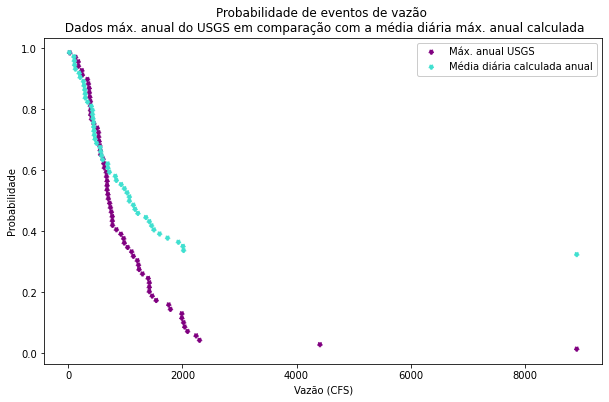

In [457]:
## Plot 5a goes in this cell
# plot calculated vs USGS annual max values
fig, ax = plt.subplots( )
usgs_anual_prob.plot.scatter(x="peak_va", 
        y="probability",ax=ax,
        color = "purple",
        linestyle=':', 
        marker='o',  label = "Máx. anual USGS")

boulder_prob.plot.scatter(x="discharge", 
        y="probability",
        color = "turquoise",
        linestyle=':', ax=ax, 
        marker='o', label = "Média diária calculada anual")
ax.legend(frameon = True,
          framealpha = 1)
ax.set_ylabel("Probabilidade")
ax.set_xlabel("Vazão (CFS)")
ax.set_title("Probabilidade de eventos de vazão \n Dados máx. anual do USGS em comparação com a média diária máx. anual calculada")

###Plot 5B

Gráfico de período de retorno no eixo x e vazão no eixo y em cada dataset


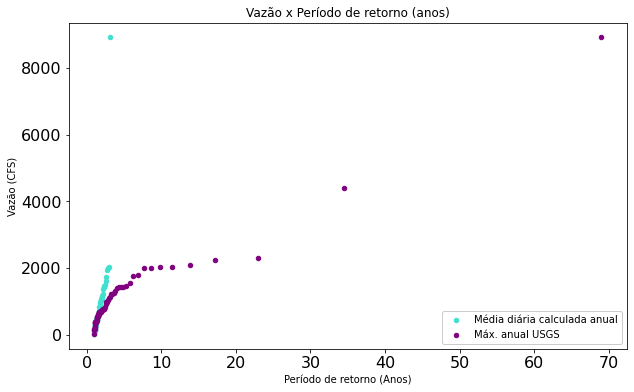

In [458]:
## Plot 5b goes in this cell
fig, ax = plt.subplots()
boulder_prob.plot.scatter(y ="discharge", 
                         x="return-years", 
                         ax=ax,
                         color='turquoise',
                         fontsize=16,
                         label="Média diária calculada anual")
usgs_anual_prob.plot.scatter(y ="peak_va",
                              x="return-years", 
                              title = "Vazão x Período de retorno (anos)",
                              ax=ax,
                              color='purple',
                              fontsize=16,
                              label="Máx. anual USGS")
ax.legend(frameon = True,
          framealpha = 1)
ax.set_xlabel("Período de retorno (Anos)")
ax.set_ylabel("Vazão (CFS)");

## Plot 6 a & b

Criar os mesmos gráficos criados acima, mas usando os dados de data/colorado-flood/precipitation/805333-precip-daily-1948-2013.csv. 

Para esse plot não havera dados anuais maximos da USGS. Serão criados ambos os data sets

In [459]:
boulder_precip_1948_2013

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
1948-08-01 01:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.00,g,
1948-08-02 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.05,,
1948-08-03 09:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.01,,
1948-08-03 14:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,
1948-08-03 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,
...,...,...,...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.10,,



Daily Sum Data
1.   Reamostrar os dados de precipitção para soma de (D)
2.   Use a função calculate_return para calcular o retorno e a probabilidade dos dados
3.   Esteja certo de "scale" os dados de anos de retorno e a probabilidade como foi feito com os dados de vazão.

4. Isso significa que a coluna de return years será divida por 365 e a de probabilidade será multiplicada por 365.



In [460]:
boulder_precip_daily=boulder_precip_1948_2013.resample("D").sum()
boulder_precip_daily

,HPCP
DATE,
1948-08-01,0.00
1948-08-02,0.05
1948-08-03,0.07
1948-08-04,0.14
1948-08-05,0.02
...,...
2013-12-27,0.00
2013-12-28,0.00
2013-12-29,0.00


In [461]:
boulder_prob_day = calculate_return(boulder_precip_daily, "HPCP")
boulder_prob_day

,rank,HPCP,probability,return-years
DATE,,,,
1948-08-01,1,0.00,0.999958,1.000042
1990-04-18,2,0.00,0.999916,1.000084
1990-04-15,3,0.00,0.999874,1.000126
1990-04-14,4,0.00,0.999833,1.000167
1990-04-13,5,0.00,0.999791,1.000209
...,...,...,...,...
1967-08-30,23890,3.09,0.000209,4779.000000
1969-05-06,23891,3.33,0.000167,5973.750000
1951-08-03,23892,4.90,0.000126,7965.000000


In [462]:
boulder_prob_day = boulder_prob_day.sort_index(ascending=True)
boulder_prob_day

,rank,HPCP,probability,return-years
DATE,,,,
1948-08-01,1,0.00,0.999958,1.000042
1948-08-02,20050,0.05,0.160912,6.214564
1948-08-03,20185,0.07,0.155263,6.440701
1948-08-04,21755,0.14,0.089558,11.165888
1948-08-05,19777,0.02,0.172337,5.802574
...,...,...,...,...
2013-12-27,7201,0.00,0.698640,1.431353
2013-12-28,7200,0.00,0.698682,1.431267
2013-12-29,7199,0.00,0.698724,1.431181


In [463]:
boulder_prob_day.describe()

,rank,HPCP,probability,return-years
count,23894.000000,23894.000000,23894.000000,23894.000000
mean,11947.500000,0.048725,0.500000,10.659065
std,6897.748002,0.185933,0.288669,197.975678
min,1.000000,0.000000,0.000042,1.000042
25%,5974.250000,0.000000,0.250021,1.333371
50%,11947.500000,0.000000,0.500000,2.000000
75%,17920.750000,0.000000,0.749979,3.999665
max,23894.000000,7.300000,0.999958,23895.000000


In [464]:
# Because these data are daily, divide return period in days by 365 to get a return period in years
boulder_prob_day["return-years"] = boulder_prob_day["return-years"] / 365
#E multiplique a probabilidade por 365
boulder_prob_day["probability"] = boulder_prob_day["probability"] * 365

boulder_prob_day

,rank,HPCP,probability,return-years
DATE,,,,
1948-08-01,1,0.00,364.984725,0.002740
1948-08-02,20050,0.05,58.732999,0.017026
1948-08-03,20185,0.07,56.670852,0.017646
1948-08-04,21755,0.14,32.688847,0.030591
1948-08-05,19777,0.02,62.903118,0.015897
...,...,...,...,...
2013-12-27,7201,0.00,255.003557,0.003922
2013-12-28,7200,0.00,255.018832,0.003921
2013-12-29,7199,0.00,255.034108,0.003921


In [465]:
boulder_prob_day.describe()

,rank,HPCP,probability,return-years
count,23894.000000,23894.000000,23894.000000,23894.000000
mean,11947.500000,0.048725,182.500000,0.029203
std,6897.748002,0.185933,105.364219,0.542399
min,1.000000,0.000000,0.015275,0.002740
25%,5974.250000,0.000000,91.257638,0.003653
50%,11947.500000,0.000000,182.500000,0.005479
75%,17920.750000,0.000000,273.742362,0.010958
max,23894.000000,7.300000,364.984725,65.465753




Annual Max Data 

1. Usando o daily sum calculado acima, calcule o valor máximo anual de precipitação total diária. Então calcule o retorno e a probabilidade usando a função nos dados maximos anuais.



In [466]:
boulder_precip_dia_max_ano=boulder_precip_daily.resample("Y").max()
boulder_precip_dia_max_ano

,HPCP
DATE,
1948-12-31,0.55
1949-12-31,2.16
1950-12-31,2.00
1951-12-31,4.90
1952-12-31,1.84
...,...
2009-12-31,1.30
2010-12-31,1.20
2011-12-31,1.30


In [467]:
boulder_prob_anual = calculate_return(boulder_precip_dia_max_ano, "HPCP")

boulder_prob_anual

,rank,HPCP,probability,return-years
DATE,,,,
1948-12-31,1,0.55,0.985075,1.015152
1954-12-31,2,0.85,0.970149,1.030769
1975-12-31,3,0.90,0.955224,1.046875
1964-12-31,4,0.96,0.940299,1.063492
1989-12-31,5,1.00,0.925373,1.080645
...,...,...,...,...
1997-12-31,62,3.00,0.074627,13.400000
1967-12-31,63,3.09,0.059701,16.750000
1969-12-31,64,3.33,0.044776,22.333333


In [468]:
boulder_prob_anual.describe()

,rank,HPCP,probability,return-years
count,66.000000,66.000000,66.000000,66.000000
mean,33.500000,1.810152,0.500000,4.846767
std,19.196354,0.995951,0.286513,9.418632
min,1.000000,0.550000,0.014925,1.015152
25%,17.250000,1.212500,0.257463,1.346837
50%,33.500000,1.485000,0.500000,2.000446
75%,49.750000,2.087500,0.742537,3.886438
max,66.000000,7.300000,0.985075,67.000000


##Plot 6A

* discharge of the x-axis and probability on the y-axis for each dataset (one plot)
 
* plot the data on the y-axis on a log scale for best representation of differences in the data

Text(0.5, 1.0, 'Probabilidade de eventos de chuva \n Diário x Anual calculado')

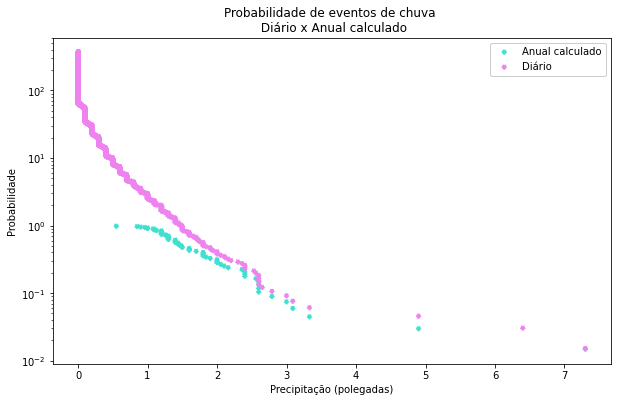

In [469]:
## Plot 6A

fig, ax = plt.subplots( )
boulder_prob_anual.plot.scatter(x="HPCP", 
        y="probability",ax=ax,
        color = "turquoise",
        linestyle=':', logy=True,
        marker='o',  label = "Anual calculado")

boulder_prob_day.plot.scatter(x="HPCP", 
        y="probability",
        color = "violet",
        linestyle=':', ax=ax,logy=True,
        marker='o', label = "Diário")
ax.legend(frameon = True,
          framealpha = 1)
ax.set_ylabel("Probabilidade")
ax.set_xlabel("Precipitação (polegadas)")
ax.set_title("Probabilidade de eventos de chuva \n Diário x Anual calculado")

##Plot 6B


*   Return period of the x-axis and Discharge (CFS) on the y-axis for each dataset (one plot)
*   plot the data on the y-axis on a log scale for best representation of differences in the data




Text(0.5, 1.0, 'Probabilidade de eventos de chuva \n Diário x Anual calculado')

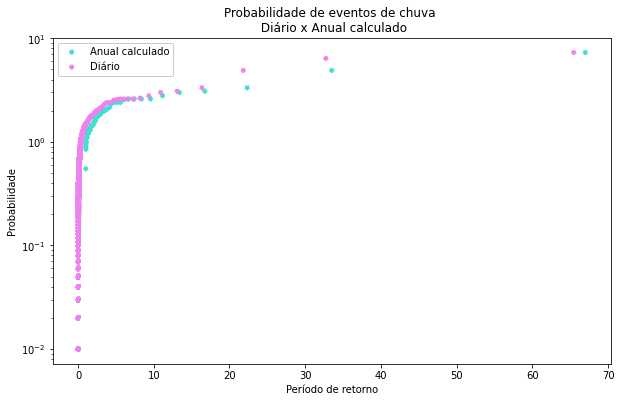

In [470]:
## Plot 6b goes in this cell

fig, ax = plt.subplots( )
boulder_prob_anual.plot.scatter(y="HPCP", 
         x="return-years", ax=ax,
        color = "turquoise",
        linestyle=':', logy=True,
        marker='o',  label = "Anual calculado")

boulder_prob_day.plot.scatter(y="HPCP", 
          x="return-years",
        color = "violet", title = "Precipitação x Período de retorno (anos)",
        linestyle=':', ax=ax,logy=True,
        marker='o', label =  "Diário")
ax.legend(frameon = True,
          framealpha = 1)
ax.set_ylabel("Probabilidade")
ax.set_xlabel("Período de retorno")
ax.set_title("Probabilidade de eventos de chuva \n Diário x Anual calculado")